In [1]:
separator = "-+-+-+-+-+-+-+-+-+-+-"

with open("../data/DSA/Adel_Recht_und_Edelmut/manufactured.txt", "r", encoding="utf-8") as f:
    content = f.read()

posts = [post.strip() for post in content.split(separator) if post.strip()]

print("Anzahl Posts:",len(posts))

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

Anzahl Posts: 176
--- Post 1 ---
Wir schreiben das Jahr 1037 BF, Peraine ist gegangen und die ersten wärmenden Strahlen der Praiosscheibe des Ingerimm haben ein wohliges Gefühl auf eurer Haut hinterlassen. So ist die herannahende Dunkelheit und die damit noch einhergehende Kälte nichts, was Elf, Mensch oder Zwerg in den Ausläufern des Finterkamms über Nacht draußen sein läßt. Zudem dunkle Wolken über den noch immer schneebedeckten Gipfeln des Gebirges im Nordwesten hängen, wie unheilige Vorboten einer herannahenden Bedrohung. Immer wieder dringen dunkle Gelichter von den Hängen der schroffen Berge hinab in die Finsterwacht: jene westlichen Ländereien der Markgraftschaft Greifenfurt und des Herzogtums Weiden, die als Schild des Reiches über die Provinzen des Mittelreiches wachen. Immer wieder stoßen Orks in die von vielen Kämpfen gebeutelten Provinzen vor, aber auch Raubritter und Strauchdiebe treiben in den Wäldern am Fuße der Berge ihr Unwesen.
Hier weiß jeder Reisende, dass es besser

In [2]:
#Typische DSA-Wörter Pseudonymisieren, zur besseren Identifikation später
from rapidfuzz import fuzz
from nltk.tokenize import word_tokenize
from pathlib import Path

#print(posts[0])
#words = word_tokenize(posts[0], language="german")
#print(words)

for o, post in enumerate(posts): #Iterieren durch alle Posts
    print("Verarbeite Post",o+1,"von",len(posts), end='\r')
    #print_percent_done(o+1,len(posts))
    words = word_tokenize(post, language="german")
    for txt_file in Path("/home/timc/Workspace/nlp-rpg-narratives/").glob("*.txt"): #Iteriere durch alle Text-Files
        txt_file_tokens = str(txt_file).split("/")
        txt_name = txt_file_tokens[-1]
        txt_pseud = txt_name[:-4] #Nutzen den jeweiligen Namen des Text-Files als Pseudonym
        with open(txt_file, "r", encoding="utf-8") as f:
            names = [line.strip() for line in f if line.strip()]
            for name in names: #Iterieren durch alle Namen im jeweiligen Text-File
                for i, word in enumerate(words): #Iterieren durch alle Wörter aus dem jeweiligen Post
                    erg = fuzz.ratio(word, name)
                    if erg > 90.0:
                        words[i] = txt_pseud
                        #print(name,word,txt_pseud)
    posts[o] = ' '.join(words) #Ersetze alten Post in der Liste durch den neuen pseudonymisierten

#print("-----------------------------------------------------------")
#print(words)
#posts[0] = ' '.join(words)
print("\nBeispiel Post 1:",posts[0])

Verarbeite Post 176 von 176
Beispiel Post 1: Wir schreiben das Jahr 1037 BF , dsa_names ist gegangen und die ersten wärmenden Strahlen der Praiosscheibe des dsa_names haben ein wohliges Gefühl auf eurer Haut hinterlassen . So ist die herannahende Dunkelheit und die damit noch einhergehende Kälte nichts , was Elf , Mensch oder dsa_names in den Ausläufern des dsa_names über Nacht draußen sein läßt . Zudem dunkle Wolken über den noch immer schneebedeckten Gipfeln des Gebirges im Nordwesten hängen , wie unheilige Vorboten einer herannahenden Bedrohung . Immer wieder dringen dunkle Gelichter von den Hängen der schroffen Berge hinab in die Finsterwacht : jene westlichen Ländereien der Markgraftschaft dsa_names und des Herzogtums dsa_names , die als Schild des Reiches über die Provinzen des dsa_names wachen . Immer wieder stoßen Orks in die von vielen Kämpfen gebeutelten Provinzen vor , aber auch Raubritter und Strauchdiebe treiben in den Wäldern am Fuße der Berge ihr Unwesen . Hier weiß jede

In [3]:
from pipeline_preproc_lemma import TextPreprocessingPipeline #Posts von Satzzeichen und Ziffern bereinigen & anschließend lemmatisieren 

pipeline = TextPreprocessingPipeline()
posts_clean = pipeline.process_posts(posts, debug=False) #debug für print-Ausgaben der Zwischenschritte

#Posts ausgeben
for i, p in enumerate(posts_clean):
    print(f"--- Post {i+1} ---\n{p}\n")

/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Lade spaCy-Modell ...


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Post 1 ---
jahr bf strahl praiosscheibe dsa_names gefühl haut dunkelheit kälte elf mensch ausläufer dsa_names nacht wolke gipfel gebirg nordwesten vorbote bedrohung gelichter hang berg finsterwacht länderei markgraftschaft dsa_names herzogtum schild reich provinz dsa_names ork kampf provinz raubritter strauchdieb wald fuß berg unwesen reisende tag bolgrim aleezikiel reise gespann annäherung tag einsamkeit wald jäger wald jäger gemeinschaft dsa_names dsa_names alleinsein tag ende gasthof wegesrand buche leute reiseunterbrechung gegend dsa_names markenstieg tür gasthaus dsa_names dsa_stadtnames landschaft heimat wald wetter gutteil weg weg gefilde wolke berghäng dreiseit hof musik hof buche schritt wehrmauer bruchstein markenstieg tor

--- Post 2 ---
gasthof buche wetter tag dsa_names pferd meinen gasthof wehrmauer dsa_stadtnames ärger muss umhang schmutz schuhe straße dsa_stadtnames gruß dsa_names wirtin zimmer nacht speis trank

--- Post 3 ---
aleezikiel trio gasthof elf hand gesic

In [42]:
import spacy

nlp = spacy.load("de_core_news_sm")
lemmalist = []

def lemmatize_nouns(text):
        doc = nlp(text)
        return [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in {"NOUN", "PROPN"}
        ]

for post in posts_clean:
    lemmanouns = lemmatize_nouns(post)
    doclemma = " ".join(lemmanouns)
    lemmalist.append(doclemma)
    print(doclemma)

jahr bf strahl gefühl dunkelheit mensch nacht wolke gipfel bedrohung hang berg markgraftschaft herzogtum schild kampf provinz raubritter wald fuß berg unwesen tag reise annäherung tag wald wald gemeinschaft alleinsein tag ende gasthof leute reiseunterbrechung tür gasthaus dsa_names heimat wald gutteil wolke berghäng hof musik hof schritt bruchstein tor
gasthof tag pferd gasthof wehrmauer muss schmutz straße gruß wirtin zimmer nacht speis trank
aleezikiel trio gasthof hand gesicht mann freund frage getränk mann jagd stocke gürtel freund dsa_names tisch hand nase gruß mann kling
tavern fellbüschel gast platz beachtung getränk auge weg art dsa_names gedanke hand rand dsa_names eintopf bündel holz platz raum tag bemühung stuhl aufmerksamkeit raum reaktion
tür lässt wind frau rüstung mantel fleck boronsrad plattenrüstung haar auge gruß wirtin zimmer nacht platz stall saft tisch platz
hundsgrab musik eintopf wirtin hullheimer mittvierzigerin pausback dutt mann bein theke gruß herr getränk we

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
nltk.download('stopwords') #Abfrage einbauen, ob stopwords bereits heruntergeladen wurden
from nltk.corpus import stopwords #Import der Stopwords aus NLTK

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["bf", "peraine", "bolgrim", "aleezikiel", "verfasst", "mordred", "dsa_names", "dsa_dnames", "dsa_gnames", "dsa_stadtnames", "dsa_namer", "isella"] #weitere Stopwords ergänzen
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, ngram_range=(1, 2))
result = tfidf.fit_transform(posts_clean) #TF-IDF-Matrix erstellen

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
import pandas as pd

words = tfidf.get_feature_names_out() #Wortliste aus dem Vokabular der TF-IDF-Matrix
df = pd.DataFrame(result.toarray(), columns=words) #DataFrame aus der TF-IDF-Matrix erstellen
print(df)

     abblendlatern  abblendlatern armbrust  \
0              0.0                     0.0   
1              0.0                     0.0   
2              0.0                     0.0   
3              0.0                     0.0   
4              0.0                     0.0   
..             ...                     ...   
171            0.0                     0.0   
172            0.0                     0.0   
173            0.0                     0.0   
174            0.0                     0.0   
175            0.0                     0.0   

     abblendlatern armbrust gelegenheit  abblendlaterne  abblendlaterne licht  \
0                                   0.0             0.0                   0.0   
1                                   0.0             0.0                   0.0   
2                                   0.0             0.0                   0.0   
3                                   0.0             0.0                   0.0   
4                                   0.0   

In [65]:
#Wichtigste Wörter pro Post ausgeben
for i, doc in enumerate(posts_clean):
    print(f"\n--- Wichtigste Wörter in Post {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(4))


--- Wichtigste Wörter in Post 1 ---
wald           0.171501
tag            0.150675
markenstieg    0.130198
wald jäger     0.130198
Name: 0, dtype: float64

--- Wichtigste Wörter in Post 2 ---
gasthof                    0.220966
pferd gasthof wehrmauer    0.147870
pferd gasthof              0.147870
speis trank                0.147870
Name: 1, dtype: float64

--- Wichtigste Wörter in Post 3 ---
mann      0.216166
freund    0.163115
elf       0.160737
tisch     0.140565
Name: 2, dtype: float64

--- Wichtigste Wörter in Post 4 ---
theke    0.195628
raum     0.184544
platz    0.149241
elf      0.110973
Name: 3, dtype: float64

--- Wichtigste Wörter in Post 5 ---
platz                   0.175955
rüstung mantel fleck    0.124532
saft                    0.124532
saft wasser             0.124532
Name: 4, dtype: float64

--- Wichtigste Wörter in Post 6 ---
wirtin     0.174424
forell     0.132465
theke      0.132465
getränk    0.114382
Name: 5, dtype: float64

--- Wichtigste Wörter in Post 7 -

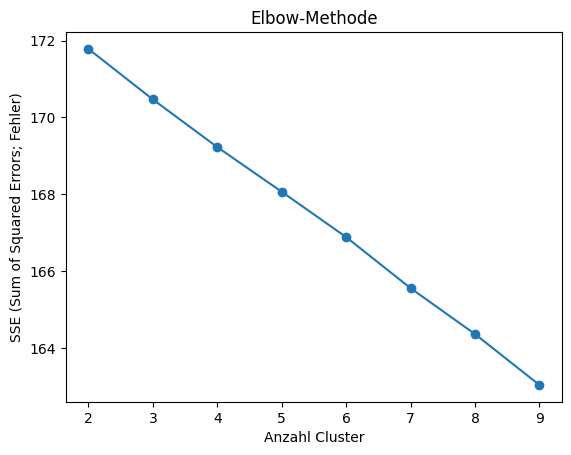

In [66]:
#Wie viele Cluster sind sinnvoll? (Elbow-Methode)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(2, 10)  # teste 2-9 Cluster

for k in K:
    km = KMeans(n_clusters=k, random_state=42) #Initialisiere KMeans
    km.fit(result) #Fitte KMeans auf die TF-IDF-Matrix
    sse.append(km.inertia_) #SSE (Sum of Squared Errors) speichern

plt.plot(K, sse, '-o') #Elbow-Kurve plotten
plt.xlabel("Anzahl Cluster")
plt.ylabel("SSE (Sum of Squared Errors; Fehler)")
plt.title("Elbow-Methode")
plt.show()

In [67]:
#Clustering mittels k-means
from sklearn.cluster import KMeans

#KMeans Clustering
k = 4  # Anzahl Cluster
model = KMeans(n_clusters=k, random_state=42) #Initialisiere KMeans
model.fit(result) #Fitte KMeans auf die TF-IDF-Matrix

#Cluster-Zuordnung pro Dokument
labels = model.labels_

for i, (doc, label) in enumerate(zip(posts_clean, labels)):
    print(f"[Cluster {label}] {doc}")

[Cluster 0] jahr bf strahl praiosscheibe dsa_names gefühl haut dunkelheit kälte elf mensch ausläufer dsa_names nacht wolke gipfel gebirg nordwesten vorbote bedrohung gelichter hang berg finsterwacht länderei markgraftschaft dsa_names herzogtum schild reich provinz dsa_names ork kampf provinz raubritter strauchdieb wald fuß berg unwesen reisende tag bolgrim aleezikiel reise gespann annäherung tag einsamkeit wald jäger wald jäger gemeinschaft dsa_names dsa_names alleinsein tag ende gasthof wegesrand buche leute reiseunterbrechung gegend dsa_names markenstieg tür gasthaus dsa_names dsa_stadtnames landschaft heimat wald wetter gutteil weg weg gefilde wolke berghäng dreiseit hof musik hof buche schritt wehrmauer bruchstein markenstieg tor
[Cluster 2] gasthof buche wetter tag dsa_names pferd meinen gasthof wehrmauer dsa_stadtnames ärger muss umhang schmutz schuhe straße dsa_stadtnames gruß dsa_names wirtin zimmer nacht speis trank
[Cluster 2] aleezikiel trio gasthof elf hand gesicht gestank 

In [68]:
#Welche Wörter charakterisieren jedes Cluster?
import numpy as np

words = tfidf.get_feature_names_out()
centers = model.cluster_centers_

for i in range(k):
    print(f"\nTop-Wörter Cluster {i}:")
    top_indices = centers[i].argsort()[::-1][:10]  #10 wichtigste Wörter
    print([words[idx] for idx in top_indices])


Top-Wörter Cluster 0:
['lager', 'wache', 'fuß', 'nacht', 'leid', 'mensch', 'deckung', 'götter', 'beldenbach fuß essbares', 'beldenbach fuß']

Top-Wörter Cluster 1:
['gang', 'stimme', 'wand', 'wort', 'spur', 'licht', 'wald', 'geräusch', 'spinne', 'schild']

Top-Wörter Cluster 2:
['blick', 'wirtin', 'platz', 'herr', 'tisch', 'frau', 'gasthaus', 'gruß', 'ort', 'elf']

Top-Wörter Cluster 3:
['kopf', 'gespräch', 'kopf gespräch', 'dickicht kopf', 'dickicht kopf sache', 'kopf sache', 'dickicht', 'sache', 'stiefvater', 'straße']


## Wichtigste Wörter für den Thread

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(
    stop_words=german_stopwords,
    ngram_range=(1, 2)
)


tfidf_matrix = vectorizer.fit_transform(lemmalist)


In [70]:
feature_names = np.array(vectorizer.get_feature_names_out())

# Mittelwert der TF-IDF-Werte über alle Posts im Thread
mean_tfidf = tfidf_matrix.mean(axis=0).A1

top_n = 20
top_indices = mean_tfidf.argsort()[::-1][:top_n]

top_words = feature_names[top_indices]
top_scores = mean_tfidf[top_indices]

list(zip(top_words, top_scores))


[('wort', np.float64(0.024716591255045453)),
 ('gang', np.float64(0.022110789453230206)),
 ('blick', np.float64(0.02134305825882432)),
 ('licht', np.float64(0.019950399732958462)),
 ('richtung', np.float64(0.019263831945314922)),
 ('wand', np.float64(0.01910869565591451)),
 ('spur', np.float64(0.018541808829842132)),
 ('wirtin', np.float64(0.017468365835592012)),
 ('wald', np.float64(0.016734832978924235)),
 ('stimme', np.float64(0.01593202401075771)),
 ('hand', np.float64(0.015164771281239204)),
 ('herr', np.float64(0.014215280289226528)),
 ('auge', np.float64(0.014204002168125666)),
 ('frau', np.float64(0.014031204249040497)),
 ('zeit', np.float64(0.014005107761786624)),
 ('kopf', np.float64(0.013030148240442395)),
 ('kampf', np.float64(0.012886665840885799)),
 ('platz', np.float64(0.012242932863857862)),
 ('fackel', np.float64(0.011961931366980084)),
 ('sache', np.float64(0.011807381644018088))]

In [71]:
", ".join(top_words[:10])


'wort, gang, blick, licht, richtung, wand, spur, wirtin, wald, stimme'

In [72]:
from collections import Counter

all_tokens = " ".join(posts_clean).split()
freq = Counter(all_tokens)

top_words_with_freq = [
    (w, score, freq[w])
    for w, score in zip(top_words, top_scores)
]

top_words_with_freq

[('wort', np.float64(0.024716591255045453), 34),
 ('gang', np.float64(0.022110789453230206), 19),
 ('blick', np.float64(0.02134305825882432), 24),
 ('licht', np.float64(0.019950399732958462), 21),
 ('richtung', np.float64(0.019263831945314922), 25),
 ('wand', np.float64(0.01910869565591451), 10),
 ('spur', np.float64(0.018541808829842132), 23),
 ('wirtin', np.float64(0.017468365835592012), 25),
 ('wald', np.float64(0.016734832978924235), 22),
 ('stimme', np.float64(0.01593202401075771), 20),
 ('hand', np.float64(0.015164771281239204), 17),
 ('herr', np.float64(0.014215280289226528), 19),
 ('auge', np.float64(0.014204002168125666), 19),
 ('frau', np.float64(0.014031204249040497), 16),
 ('zeit', np.float64(0.014005107761786624), 14),
 ('kopf', np.float64(0.013030148240442395), 13),
 ('kampf', np.float64(0.012886665840885799), 12),
 ('platz', np.float64(0.012242932863857862), 15),
 ('fackel', np.float64(0.011961931366980084), 10),
 ('sache', np.float64(0.011807381644018088), 7)]